# Биномиальный критерий для доли

In [4]:
import numpy as np
from scipy import stats

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Shaken, not stirred

Джеймс Бонд говорит, что предпочитает мартини взболтанным, но не смешанным. Проведём слепой тест (blind test): $n$ раз предложим ему пару напитков и выясним, какой из двух он предпочитает. Получаем: 
* **выборка:** бинарный вектор длины $n$, где 1 — Джеймс Бонд предпочел взболтанный напиток, 0 — смешанный;
* **гипотеза $H_0$:** Джеймс Бонд не различает 2 вида напитков и выбирает наугад;
* **статистика $T$:** количество единиц в выборке.

Если нулевая гипотеза справедлива и Джеймс Бонд действительно выбирает наугад, то мы можем с одинаковой вероятностью получить любой из $2^n$ бинарных векторов длины $n$. 

Мы могли бы перебрать все такие векторы, посчитать на каждом значение статистики $T$ и получить таким образом её нулевое распределение. Но в данном случае этот этап можно пропустить: мы имеем дело с выборкой, состоящей из 0 и 1, то есть, из распределения Бернулли $Ber(p)$. Нулевая гипотеза выбора наугад соответствует значению $p=\frac1{2}$, то есть, в каждом эксперименте вероятность выбора взболтанного мартини равна $\frac1{2}$. Сумма $n$ одинаково распределённых бернуллиевских случайных величин с параметром $p$ имеет биномиальное распределение $Bin(n, p)$. Следовательно, нулевое распределение статистики $T$ — $Bin\left(n, \frac1{2}\right)$.

Пусть $n=16.$

In [6]:
n = 100
F_H0 = stats.binom(n, 0.75)

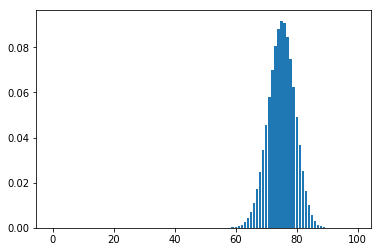

In [8]:
x = np.linspace(0,99,100)

pylab.bar(x, F_H0.pmf(x), align = 'center')
# xlim(-0.5, 16.5) 
pylab.show()

## Односторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает взболтанный мартини.

При такой альтернативе более вероятны большие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом хвосте распределения.

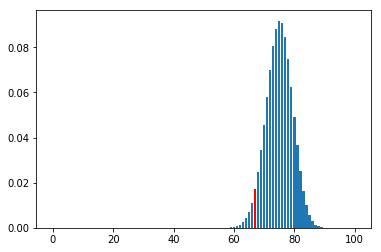

In [10]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(67,100,75), F_H0.pmf(np.linspace(67,100,75)), align = 'center', color='red')
#xlim(-0.5, 16.5) 
pylab.show()

In [46]:
stats.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.082222588913866079

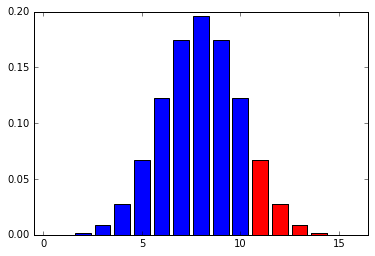

In [10]:
# pylab.bar(x, F_H0.pmf(x), align = 'center')
# pylab.bar(np.linspace(11,16,6), F_H0.pmf(np.linspace(11,16,6)), align = 'center', color='red')
# xlim(-0.5, 16.5) 
# pylab.show()

In [11]:
# stats.binom_test(11, 16, 0.5, alternative = 'greater')

0.10505676269531246

## Двусторонняя альтернатива

**гипотеза $H_1$:** Джеймс Бонд предпочитает какой-то определённый вид мартини.

При такой альтернативе более вероятны очень большие и очень маленькие значения статистики; при расчёте достигаемого уровня значимости будем суммировать высоту столбиков в правом и левом хвостах распределения.

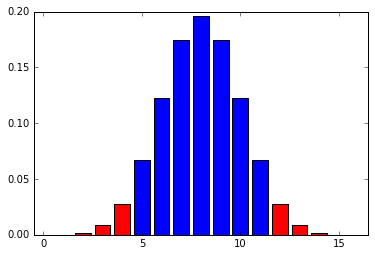

In [12]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(67,100,5), F_H0.pmf(np.linspace(12,16,5)), align = 'center', color='red')
pylab.bar(np.linspace(0,4,5), F_H0.pmf(np.linspace(0,4,5)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [13]:
stats.binom_test(12, 16, 0.5, alternative = 'two-sided')

0.076812744140625

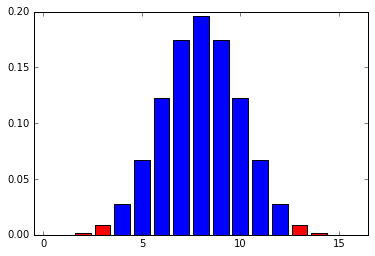

In [14]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(13,16,4), F_H0.pmf(np.linspace(13,16,4)), align = 'center', color='red')
pylab.bar(np.linspace(0,3,4), F_H0.pmf(np.linspace(0,3,4)), align = 'center', color='red')
xlim(-0.5, 16.5) 
pylab.show()

In [15]:
stats.binom_test(13, 16, 0.5, alternative = 'two-sided')

0.021270751953125

In [14]:
file_obj = open('pines.txt', 'r')
print file_obj.read()

sn	we
200	8.8
199.3	10
193.6	22.4
167.7	35.6
183.9	45.4
182.5	47.2
166.1	48.8
160.7	42.1
162.9	29
166.4	33.6
163	35.8
156.1	38.7
157.6	42.8
154.4	36.2
150.8	45.8
144.6	25.4
142.7	25.4
144	28.3
143.5	36.9
123.1	14.3
113.9	13.1
114.9	8.1
101.4	9.3
105.7	9.1
106.9	14.7
127	29.7
129.8	45.8
136.3	44.2
106.7	49.4
103.4	49.6
89.7	10.8
10.8	0
26.4	5.4
11	5.5
5.1	3.9
10.1	8.5
18.9	11.3
28.4	11
41.1	9.2
41.2	12.6
33.9	21.4
40.8	39.8
49.7	18.2
6.7	46.9
11.6	46.9
17.2	47.9
19.4	50
26.9	47.9
39.6	47.9
38	50.7
19.1	45.2
32.1	35
28.4	35.5
3.8	44.8
8.5	43.4
11.2	40.2
22.4	34.3
23.8	33.3
24.9	29.8
9	38.9
10.4	61.2
30.9	52.2
48.9	67.8
49.5	73.8
46.3	80.9
44.1	78
48.5	94.8
45.9	90.4
44.2	84
37	64.3
36.3	67.7
36.7	71.5
35.3	78.3
33.5	81.6
29.3	83.8
22.4	84.1
17.1	84.7
27.3	89.4
27.9	90.6
48.4	99.5
43.6	98.4
39	97.3
14.9	91.2
6.1	96.2
10.7	98.6
22.2	100
32.7	99.1
0.9	100
93.5	96.2
85.1	90.6
92.8	61.5
91.3	69.5
95.9	59.7
93.4	71.5
89.6	86.3
99.5	78.9
100.6	53.1
103.5	72.1
104.7	74
104	67.1
104.2	64.7
105	59

In [17]:
import pandas as pd
file_obj = open('pines.txt')
data_list = file_obj.readlines()
for line in data_list: print line
df = pd.DataFrame(line.split('\t') for line in data_list)

sn	we

200	8.8

199.3	10

193.6	22.4

167.7	35.6

183.9	45.4

182.5	47.2

166.1	48.8

160.7	42.1

162.9	29

166.4	33.6

163	35.8

156.1	38.7

157.6	42.8

154.4	36.2

150.8	45.8

144.6	25.4

142.7	25.4

144	28.3

143.5	36.9

123.1	14.3

113.9	13.1

114.9	8.1

101.4	9.3

105.7	9.1

106.9	14.7

127	29.7

129.8	45.8

136.3	44.2

106.7	49.4

103.4	49.6

89.7	10.8

10.8	0

26.4	5.4

11	5.5

5.1	3.9

10.1	8.5

18.9	11.3

28.4	11

41.1	9.2

41.2	12.6

33.9	21.4

40.8	39.8

49.7	18.2

6.7	46.9

11.6	46.9

17.2	47.9

19.4	50

26.9	47.9

39.6	47.9

38	50.7

19.1	45.2

32.1	35

28.4	35.5

3.8	44.8

8.5	43.4

11.2	40.2

22.4	34.3

23.8	33.3

24.9	29.8

9	38.9

10.4	61.2

30.9	52.2

48.9	67.8

49.5	73.8

46.3	80.9

44.1	78

48.5	94.8

45.9	90.4

44.2	84

37	64.3

36.3	67.7

36.7	71.5

35.3	78.3

33.5	81.6

29.3	83.8

22.4	84.1

17.1	84.7

27.3	89.4

27.9	90.6

48.4	99.5

43.6	98.4

39	97.3

14.9	91.2

6.1	96.2

10.7	98.6

22.2	100

32.7	99.1

0.9	100

93.5	96.2

85.1	90.6

92.8	61.5

91.3	69.5

95.9

In [19]:
df.columns = ['sn','we']
df = df.drop(0)
df.sn = df.sn.apply(pd.to_numeric)
df['we'] = df['we'].str.replace('\n','').apply(pd.to_numeric)

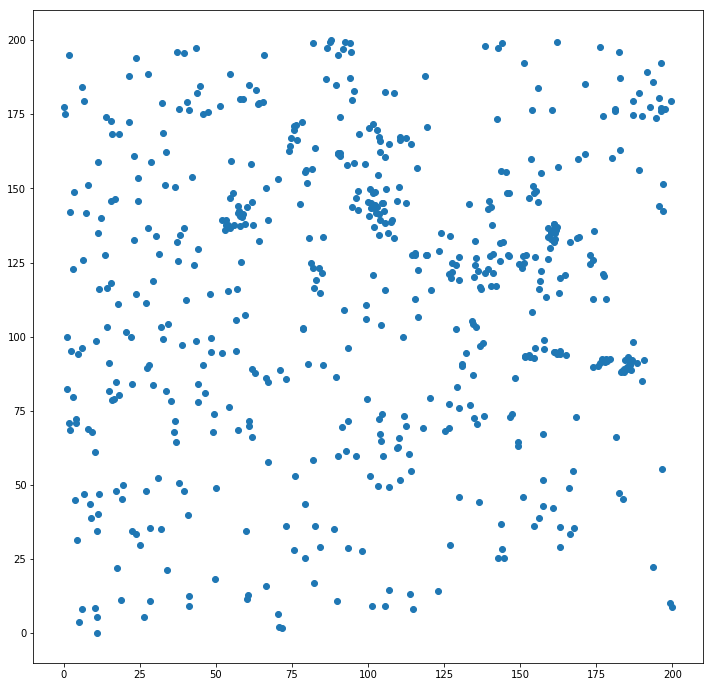

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (12,12))
plt.scatter(df.sn,df.we)

In [23]:
from scipy import stats

In [29]:
array = stats.binned_statistic_2d(df.we, df.sn, None, 'count', bins=[5,5])

In [35]:
arr = array.statistic.reshape?
#array.statistic.mean()


In [43]:
arr = array.statistic.reshape((1,25))
arr

array([[ 18.,  14.,  12.,   8.,   7.,  26.,  12.,  24.,  19.,   8.,  29.,
         22.,  15.,  31.,  37.,  25.,  34.,  50.,  50.,  27.,  20.,  25.,
         37.,   7.,  27.]])

In [44]:
observed_frequences = np.(arr)

In [45]:
observed_frequences

25

1. Вопрос 1
По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

0.0822 - верно

Вопрос 21
point
2. Вопрос 2
Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? """"Выберите все возможные варианты.""" - ЭТО И ЕСТЬ ПРАВИЛЬНЫЙ ОТВЕТ


3. Вопрос 3
The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

pines.txt
Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

23.36 - верно


4. Вопрос 4
Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.



5. Вопрос 5
Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно?

Нулевое распределение статистики — хи-квадрат с 25-1=2425−1=24 степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы K-1K−1, где KK — количество интервалов).

Посчитайте достигаемый уровень значимости.

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?


Достигаемый уровень значимости меньше 0.05, гипотеза равномерности отвергается. - верно

